In [1]:
%pylab inline
from ipywidgets import interact
import seaborn as sns
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


# Координаты

Координаты означает Со-упорядоченные значения. 

В простейшем случае это два ряда чисел, упорядоченные попарно. 
Со времен Декарта для описания положения в плоском пространстве используют две координаты $x$ и $у$.

Рассмотрим задачу рисования произвольных геометрических форм. Это может пригодиться для составных иллюстраций, снабженных аннотациями, или для наглядного представления двухмерных объектов.

Например, мы хотим отобразить сравнительные размеры лепестков, чтобы визуально оценить различия между ними по площади, так как это происходит при восприятии их насекомыми.

:::{figure-md} iris_petal_sepal
![](i/iris_petal_sepal.png)

Форма лепестков ириса
[&copy;]( http://sebastianraschka.com/Articles/2014_python_lda.html)
:::

Загрузим набор данных и возьмем размеры прилистника - длина и ширина (setosa №15). Приближенно будем считать, что прилистник имеет форму ромба.

In [2]:
D = sns.load_dataset('iris')
D.species.value_counts() # посчитаем, сколько экземпляров каждого вида

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [3]:
#D.columns
D.loc[14,['sepal_length', 'sepal_width']]

sepal_length    5.8
sepal_width     4.0
Name: 14, dtype: object

In [4]:
l, w = D.loc[14,['sepal_length', 'sepal_width']]  #такая запись распределяет значения из списка по списку переменных
l, w

(5.8, 4.0)

Для рисования ромба нужны координаты 4 точек - вершин ромба.
Пусть нижний конец ромба "упирается" в точку `(0,0)`. Проведем мысленно линию по часовой стрелке.
Координата `x` будем меняться в отрицательную сторону, затем вернется в 0, затем изменится в положительную сторону и вернется в 0. Координата `y` также будет меняться, но при этом всегда будет больше 0.

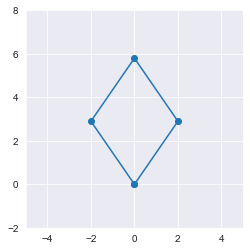

In [6]:
xx=[0, -w/2, 0, w/2, 0]
yy=[0, l/2, l, l/2, 0]
plot(xx,yy, '-o'); axis('square'); xlim(-5,5); ylim(-2,8); 
#зададим ровную сетку, чтобы заметно было изменение пропорций

Ромб расположен в середине рисунка, и в середине ромба будет среднее значение его точек.

In [7]:
mean(xx[:-1]), mean(yy[:-1])

(0.0, 2.9)

"Поставим" фигуру в центр, для чего вычтем из значений ординат их среднее значение (для абсцисс среднее 0 - вычитание ничего не изменит).

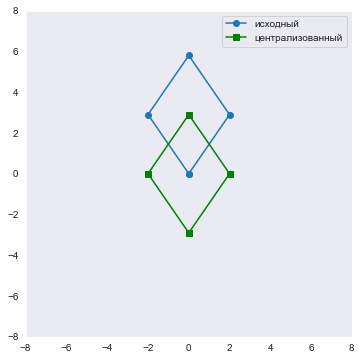

In [8]:
xx_center = array(xx) - mean(xx[:-1])
yy_center = array(yy) - mean(yy[:-1])

figsize(6,6)
plot(xx,yy, '-o', xx_center,yy_center, '-sg', ); legend(['исходный','централизованный']) 
grid(); axis('square'); xlim(-8,8); ylim(-8,8); 

Убеждаемся, что вычитание средних не меняет форму фигуры. Перемещение фигуры по плоскости называется *трансляция*.

Создадим функцию, которую сможем повторно использовать для аналогичных рисунков.
Вместо линии будем рисовать заполненный многоугольник.

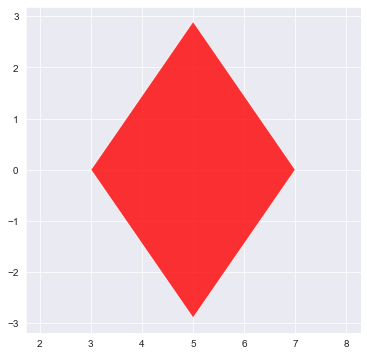

In [9]:
def lepestok(l, w, color='#795BD3', alpha=0.8, x0=0.0, y0=0.0):
    '''рисуем лепесток
    
    параметры:
    x0, y0 - координаты центра
    color - цвет заливки
    alpha - степень прозрачности
    '''
    xx=[x0, x0-w/2, x0, x0+w/2]
    yy=[y0-l/2, y0, y0+l/2, y0]
    h = fill(xx,yy, color, alpha=alpha); 
    
    axis('equal'); #одинаковый шаг сетки по осям
    return h

lepestok(l, w, color='r', x0=5)

Данную функцию можно запустить несколько раз для разных измерений и сравнить форму лепестков.

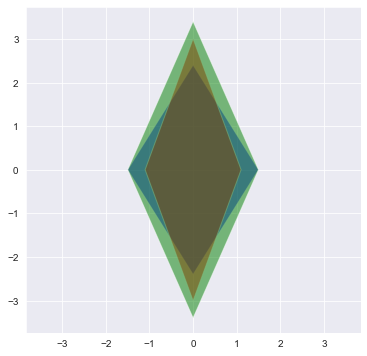

In [10]:
def risui3(i=12, alpha=.5):
    l, w = D.loc[i,['sepal_length', 'sepal_width']] 
    lepestok(l, w, 'b', alpha=alpha)
    l, w = D.loc[i+50,['sepal_length', 'sepal_width']] 
    lepestok(l, w, 'r', alpha=alpha)
    l, w = D.loc[i+100,['sepal_length', 'sepal_width']] 
    lepestok(l, w, 'g', alpha=alpha)
    
risui3()

Данный пример помогает понять роль прозрачности, потому что три лепестка наложены друг на друга относительно центра.

Но можно изменить центр отображения лепестка и расположить их рядом.


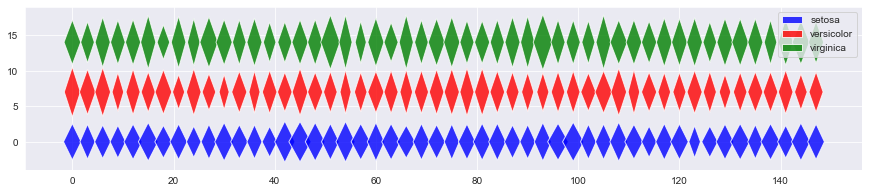

In [11]:
k1 = 'sepal_length'
k2 = 'sepal_width'

figure(figsize(15,3))
n = 50
xstep=3
ystep=7
coco = ['b','r','g']
for i_spec in range(3): #цикл по видам
    for i in range(n):  #цикл по образцам
        o = D.iloc[i_spec*n + i]
        h, = lepestok(o[k1], o[k2], coco[i_spec], x0=i*xstep, y0=i_spec*ystep );
        if i==0:
            h.set_label(o.species)
        
legend(loc=0);
axis('auto');

> Для вывода такой же картинки для внутренних лепестков околоцветников, скопируйте и вставьте в предыдущую ячейку и замените переменные `k1` и `k2`.
```py
    k1 = 'petal_length'
    k2 = 'petal_width'
``` 

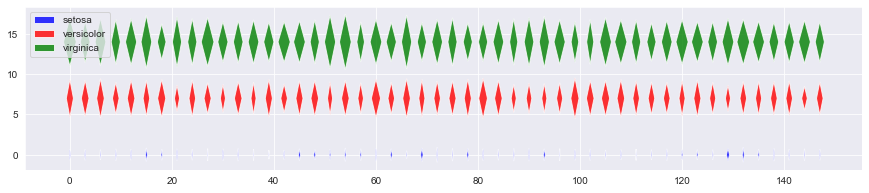

In [12]:
k1 = 'petal_length'
k2 = 'petal_width'

figure(figsize(15,3))
n = 50
xstep=3
ystep=7
coco = ['b','r','g']
for i_spec in range(3): #цикл по видам
    for i in range(n):  #цикл по образцам
        o = D.iloc[i_spec*n + i]
        h, = lepestok(o[k1], o[k2], coco[i_spec], x0=i*xstep, y0=i_spec*ystep );
        if i==0:
            h.set_label(o.species)
        
legend(loc=0);
axis('auto');

> По какому из двух рисунков сразу видно различие между видами?